<a href="https://colab.research.google.com/github/musahlamposullaiman/Lampo/blob/master/Bitcoin_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Read csv file

In [ ]:
import pandas as pd
data = pd.read_csv('BTC-USD.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [ ]:
# create 12 month moving average
data['MA12'] = data['Open'].rolling(12).mean()
# plot the data and MA
import plotly.express as px
fig = px.line(data, x="Date", y=["Open", "MA12"], template = 'plotly_dark')
fig.show()

In [ ]:
# extract month and year from dates
data['Month'] = [i.month for i in data['Date']]
data['Year'] = [i.year for i in data['Date']]

# create a sequence of numbers
import numpy as np
data['Series'] = np.arange(1,len(data)+1)

# drop unnecessary columns and re-arrange
data.drop(['Date', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'Year', 'Month', 'Open']]

# check the head of the dataset
data.head()

,Series,Year,Month,Open
0,1,2014,9,465.864014
1,2,2014,9,456.859985
2,3,2014,9,424.102997
3,4,2014,9,394.673004
4,5,2014,9,408.084991


In [ ]:
# split data into train-test set
train = data[data['Year'] < 2022]
test = data[data['Year'] >= 2022]

# check shape
train.shape, test.shape


((2663, 4), (125, 4))

##AutoML: PyCaret

In [ ]:
# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = train, test_data = test, target = 'Open', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,Session id,123
1,Target,Open
2,Target type,Regression
3,Original data shape,"(2788, 4)"
4,Transformed data shape,"(2788, 4)"
5,Transformed train set shape,"(2663, 4)"
6,Transformed test set shape,"(125, 4)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4441.4627,53160488.6289,5638.4527,0.0221,0.6887,0.3959,0.0667
huber,Huber Regressor,4518.4330,64017641.4842,6021.1025,0.0570,0.5671,0.3362,0.0600
lasso,Lasso Regression,4562.3566,54602409.5582,5761.5334,-0.0495,0.9411,0.4463,0.0700
llar,Lasso Least Angle Regression,4562.3566,54602409.5582,5761.5334,-0.0495,0.9411,0.4463,0.0733
en,Elastic Net,4563.3819,54580971.6183,5760.5871,-0.0495,0.9412,0.4466,0.0767
br,Bayesian Ridge,4576.1617,57293308.6769,5801.9941,0.0261,0.6611,0.3906,0.0800
lr,Linear Regression,4596.9059,57880692.3681,5826.5491,0.0246,0.6615,0.3912,0.0800
lar,Least Angle Regression,4596.9059,57880692.3681,5826.5491,0.0246,0.6615,0.3912,0.0800
ridge,Ridge Regression,4597.1423,57895166.4019,5827.1819,0.0246,0.6615,0.3912,0.0667
par,Passive Aggressive Regressor,6242.9837,137778048.0043,8508.8066,-0.3052,1.6258,0.4525,0.0667


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,57294.4931,3297429916.7632,57423.2524,-250146252424.4365,8.2655,4178.5614


## Generate Predictions

KeyError: ignored

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,11888.2203,391809163.0440,19794.1699,-59406403.0052,6.0590,942.0888


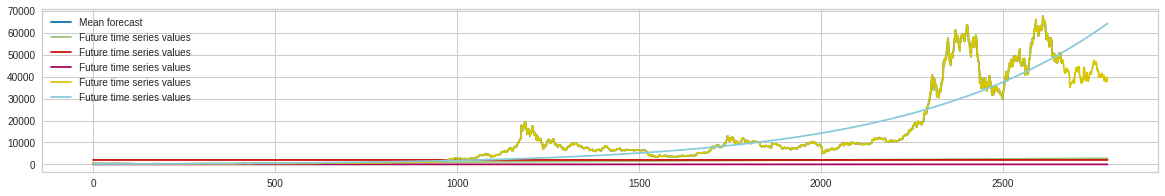

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(best, data=data)

import matplotlib.pyplot as plt
#y_pred = predictions["predict"]

plt.figure(figsize=(20, 3))

y_past = train["Close"]

y_test = test["Close"]

#plt.plot(y_past[-500:], label="Past time series values")

plt.plot(y_past, label="Mean forecast")
plt.plot(predictions, label="Future time series values")


plt.legend();

In [ ]:
predictions

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
#test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

plt.figure(figsize=(20, 3))

item_id = "H1"
y_past = train.loc[item_id]["Close"]
y_pred = predictions.loc[item_id]
y_test = test.loc[item_id]["Close"]

plt.plot(y_past[-500:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

KeyError: ignored

<Figure size 1440x216 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
y_pred = predictions["predict"]

plt.figure(figsize=(20, 3))

y_past = train_h2o["Open"]

y_test = test_h2o["Open"]

#plt.plot(y_past[-500:], label="Past time series values")

plt.plot(y_pred, label="Mean forecast")
plt.plot(y_test, label="Future time series values")


plt.legend();

KeyError: ignored